In [ ]:
# Du project Machine learning
# Date : 11/12/2021
# Author: S. Terki

# EXERCICE 1: questions on Neural Networks [4 points]

We consider a Multi-Layer Perceptron Neural Network composed of the following elements:
* Number of features in the input layer: 20
* 3 hidden layers composed of respectively, and in that order, of 256, 128 and 64 neurons.
* 1 output layer with 1 neuron
* Activation functions: ReLU for all hidden layers, Sigmoid for the output layer

1. How many parameters (weights) does this neural network have ?
2. Explain in details, with a few lines of text, the procedure used to train a neural network in a supervised way. List all "ingredients" needed to perform all steps of the training. How does one tests the performance of the algorithm ? Which figure of merits can be used ?
3. Using the [pytorch](https://pytorch.org/) syntax implement this neural network structure by completing the code below (do not try to run it !). 

#### 1. Parameters calculation
For the weights we have : 20 * 256 + 256 * 128 + 128 * 64 + 64 * 1 = 5120 + 32 768 + 8 192 + 64 = **46 144**

For the bias compenents, we have this in hidden layers + neurons in the output : 256+128+64 +1 = **449**

Weight + bias = **46 593**

*The amount of parameters in this neural network is* **46 593**

#### 2. Procedure used to train a neural network
In supervised training, both the inputs and the outputs are provided. The network then processes the inputs and compares its resulting outputs against the desired outputs. Errors are then propagated back through the system, causing the system to adjust the weights which control the network. This process occurs over and over as the weights are continually tweaked. 
 
To train a neural net we need:
* A loss function
* A procedure to compute gradients
* Regularizer and its gradient

A typical training procedure for a neural network is as follows:
- Define the neural network that has some learnable parameters (or
  weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network

# EXERCICE 2: Multiclass classification with the Iris dataset [10 points]

The Iris dataset consists of 3 different classes of irises (Setosa, Versicolour, and Virginica). Each iris is described by four features: Sepal Length, Sepal Width, Petal Length and Petal Width. 

The objective of this exercice is to train a multiclass classification model using the [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model available in `scikit-learn`.

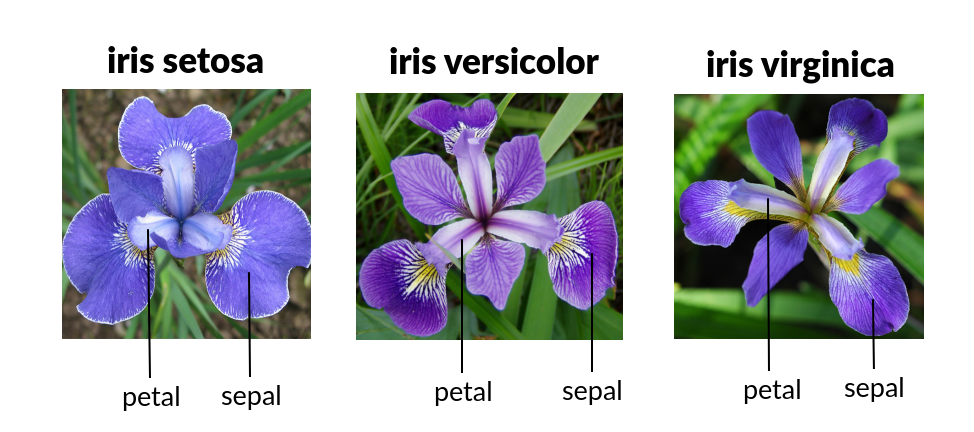
'''img src="iris-dataset.png" width="600"'''

## Initialisation

Load the following libraries.

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Question 1: Data exploration

Load the Iris dataset (run the cell below). The dataset contains 150 examples, stored in 150x4 numpy array. The rows being the samples and the columns being the features. As there are 3 classes of irises, each example corresponds to a target value: `0 = setosa, 1 = versicolor, 2 = virginica`.

In [3]:
# Load Iris dataset
iris = datasets.load_iris()

# data
X = iris.data   # features
t = iris.target # target

# description
feature_names = iris.feature_names
species = iris.target_names

print("Iris species:", species)
print("Features name:",feature_names)

Iris species: ['setosa' 'versicolor' 'virginica']
Features name: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Explore the data

1. Make a histogram of each feature of the data. On each figure represent with a different color the 3 classes of Iris.
2. Show the scatter plots of each feature versus a different feature, again using a different color for each classes (you should make 6 figures in total).

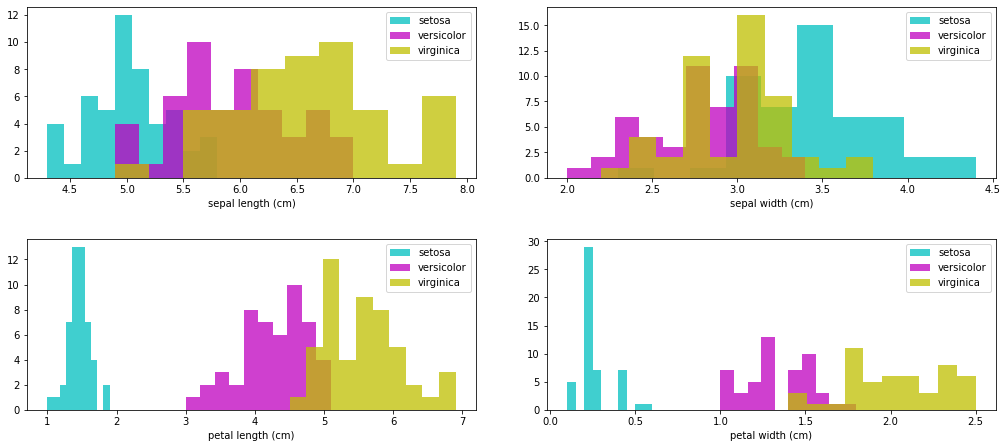

In [4]:
#Histogram of each feature
fig, ax = plt.subplots(2,2, figsize=(15, 7))
ax = ax.flatten()
fig.tight_layout(pad=4)
colors = ['c', 'm', 'y']

for label, color in zip(range(len(iris.target_names)), colors):
    ax[0].hist(iris.data[iris.target==label, 0], 
            label=iris.target_names[label],
            color=color,
            alpha=0.75)
    ax[1].hist(iris.data[iris.target==label, 1], 
            label=iris.target_names[label],
            color=color,
            alpha=0.75)
    ax[2].hist(iris.data[iris.target==label, 2], 
            label=iris.target_names[label],
            color=color,
            alpha=0.75)
    ax[3].hist(iris.data[iris.target==label, 3], 
            label=iris.target_names[label],
            color=color,
            alpha=0.75)
    
ax[0].set_xlabel(iris.feature_names[0])
ax[0].legend(loc='best')    
ax[1].set_xlabel(iris.feature_names[1])
ax[1].legend(loc='best')
ax[2].set_xlabel(iris.feature_names[2])
ax[2].legend(loc='best')
ax[3].set_xlabel(iris.feature_names[3])
ax[3].legend(loc='best')

plt.show()

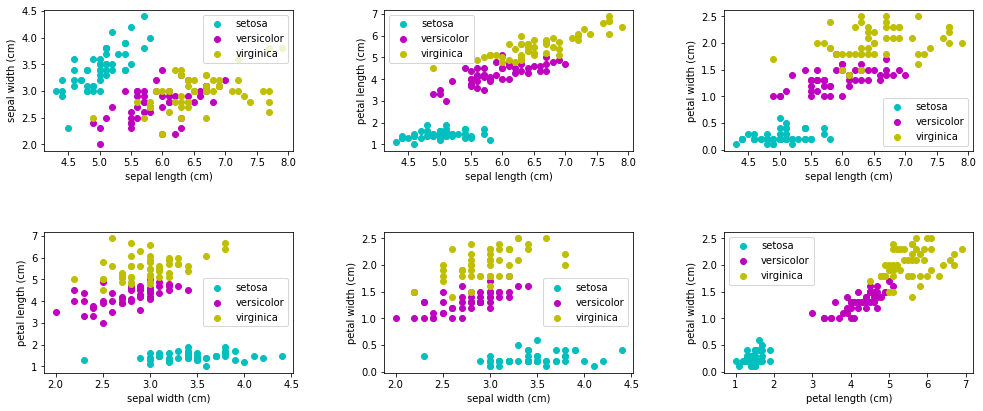

In [5]:
#Scatter plot
fig, ax = plt.subplots(2,3,figsize=(15, 7)) #need to flatten array
ax = ax.flatten()
fig.tight_layout(pad=6)

#Parameters
colors = ['c', 'm', 'y']
sepal_length, sepal_width, petal_length, petal_width =0,1,2,3

for label, color in zip(range(len(iris.target_names)), colors):
    ax[0].scatter(iris.data[iris.target==label, sepal_length], #x_index
                iris.data[iris.target==label, sepal_width], #y_index
                label=iris.target_names[label],
                c=color)
    ax[1].scatter(iris.data[iris.target==label, sepal_length], #x_index
                iris.data[iris.target==label, petal_length], #y_index
                label=iris.target_names[label],
                c=color)
    ax[2].scatter(iris.data[iris.target==label, sepal_length], #x_index
                iris.data[iris.target==label, petal_width], #y_index
                label=iris.target_names[label],
                c=color)
    ax[3].scatter(iris.data[iris.target==label, sepal_width], #x_index
                iris.data[iris.target==label, petal_length], #y_index
                label=iris.target_names[label],
                c=color)
    ax[4].scatter(iris.data[iris.target==label, sepal_width], #x_index
                iris.data[iris.target==label, petal_width], #y_index
                label=iris.target_names[label],
                c=color)
    ax[5].scatter(iris.data[iris.target==label, petal_length], #x_index
                iris.data[iris.target==label, petal_width], #y_index
                label=iris.target_names[label],
                c=color)

#legends
ax[0].set_xlabel(iris.feature_names[sepal_length])
ax[0].set_ylabel(iris.feature_names[sepal_width])
ax[0].legend(loc='best')

ax[1].set_xlabel(iris.feature_names[sepal_length])
ax[1].set_ylabel(iris.feature_names[petal_length])
ax[1].legend(loc='best')

ax[2].set_xlabel(iris.feature_names[sepal_length])
ax[2].set_ylabel(iris.feature_names[petal_width])
ax[2].legend(loc='best')

ax[3].set_xlabel(iris.feature_names[sepal_width])
ax[3].set_ylabel(iris.feature_names[petal_length])
ax[3].legend(loc='best')

ax[4].set_xlabel(iris.feature_names[sepal_width])
ax[4].set_ylabel(iris.feature_names[petal_width])
ax[4].legend(loc='best')

ax[5].set_xlabel(iris.feature_names[petal_length])
ax[5].set_ylabel(iris.feature_names[petal_width])
ax[5].legend(loc='best')

plt.show()

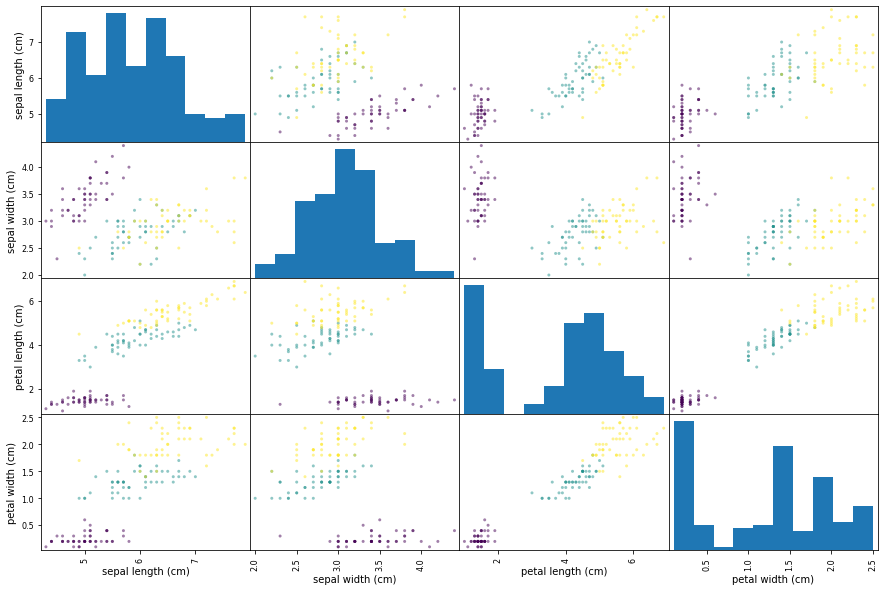

In [6]:
# using pandas
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, 
                           figsize=(15, 10));

## Question 2

1. Using the `train_test_split` method to split the dataset as follow: 2 third of the total sample size for training and 1 third for testing.

2. Initialize the logistic regression model (described here [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)) with the following parameters:

  `model = LogisticRegression(solver="lbfgs",multi_class='multinomial',penalty='l2',max_iter=500)`
  
  Describe, briefly, the meaning of all the parameters of this function.

3. Train the model on the training set. Display the values of the weights and the bias terms.

4. Predict the class label for all samples in the training and test datasets. Give the accuracy of the prediction for both samples. Comment on the results.

5. For each class show a histogram of the probability estimate `predict_proba` of being in the right class. 

In [7]:
#1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,t,test_size = 0.3, random_state = 42)

In [8]:
#2
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="lbfgs",multi_class='multinomial',penalty='l2',max_iter=500)

* solver: **lbfgs** is the algorithm to use in the optimization problem (Limited-memory Broyden–Fletcher–Goldfarb–Shanno). It approximates the second derivative matrix updates with gradient evaluations
* multi_class: **multinomial** the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary.
* penalty:  add a **L2 penalty term** (Ridge Regressor) adds a term called regularizer weight between input variables Xi and output yi which represents the sum of squares of weights in order to prevent coefficients from being zero
* max_iters: Maximum number of **iterations** taken for the solvers to converge(500)

In [9]:
#3
# Fit
%time model.fit(X_train, y_train)
print('Weights:', model.intercept_,'\nBias term:\n', model.coef_)

Wall time: 77.8 ms
Weights: [  8.86217309   2.20990864 -11.07208173] 
Bias term:
 [[-0.40460912  0.86845541 -2.27800685 -0.95749016]
 [ 0.46652092 -0.37524109 -0.18767968 -0.72036788]
 [-0.0619118  -0.49321432  2.46568653  1.67785804]]


In [10]:
#4
from sklearn import metrics #for checking the model accuracy
# Predict
x_pred_test = %time model.predict(X_test)
x_pred_train = %time model.predict(X_train)

#now we check the accuracy of the algorithm. 
print('The accuracy for test data is:',metrics.accuracy_score(x_pred_test,y_test))
print('The accuracy for trained data is:',metrics.accuracy_score(x_pred_train,y_train))

Wall time: 0 ns
Wall time: 999 µs
The accuracy for test data is: 1.0
The accuracy for trained data is: 0.9619047619047619


The accuracy obtained for our test data is 1.0 which means that is had been predicted very well, there is no flaws. This accuracy is higer than the trained data. 

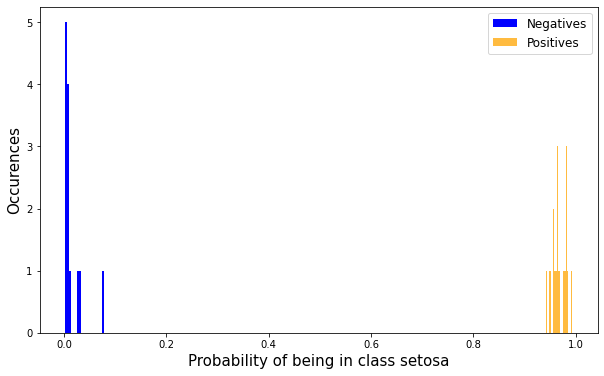

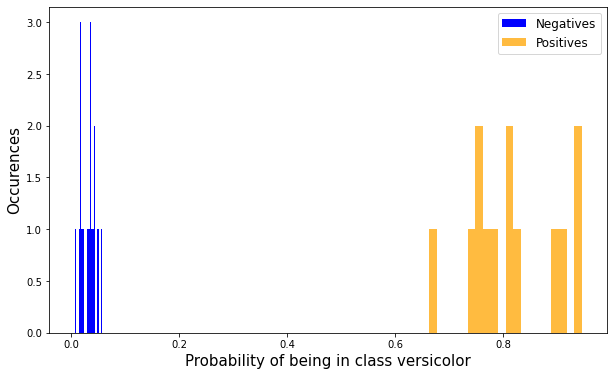

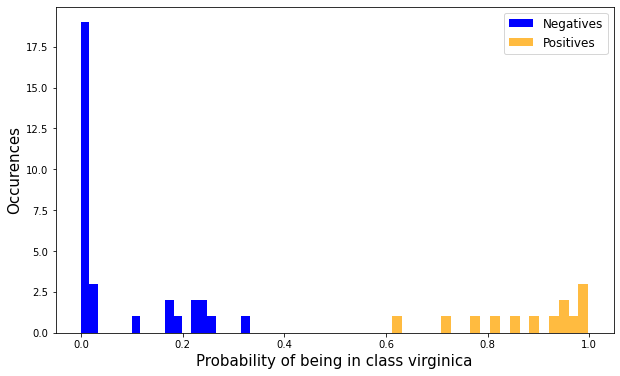

In [11]:
#5
#predicted proba 
predictions = model.predict_proba(X_test)[:,0]

#plot where the correct class is 0
plt.figure(figsize=(10,6))
plt.hist(predictions[y_test==1], bins=20, label='Negatives', color='blue')
plt.hist(predictions[y_test==0], bins=20, label='Positives', alpha=0.75, color='orange')
plt.xlabel('Probability of being in class setosa', fontsize=15)
plt.ylabel('Occurences', fontsize=15)
plt.legend(fontsize=12)
plt.show() 

#predicted proba 
predictions = model.predict_proba(X_test)[:,1]

#plot where the correct class is 0
plt.figure(figsize=(10,6))
plt.hist(predictions[y_test==0], bins=20, label='Negatives', color='blue')
plt.hist(predictions[y_test==1], bins=20, label='Positives', alpha=0.75, color='orange')
plt.xlabel('Probability of being in class versicolor', fontsize=15)
plt.ylabel('Occurences', fontsize=15)
plt.legend(fontsize=12)
plt.show() 

#predicted proba 
predictions = model.predict_proba(X_test)[:,2]

#plot where the correct class is 0
plt.figure(figsize=(10,6))
plt.hist(predictions[np.logical_or(y_test==0, y_test==1)], bins=20, label='Negatives', color='blue')
plt.hist(predictions[y_test==2], bins=20, label='Positives', alpha=0.75, color='orange')
plt.xlabel('Probability of being in class virginica', fontsize=15)
plt.ylabel('Occurences', fontsize=15)
plt.legend(fontsize=12)
plt.show()

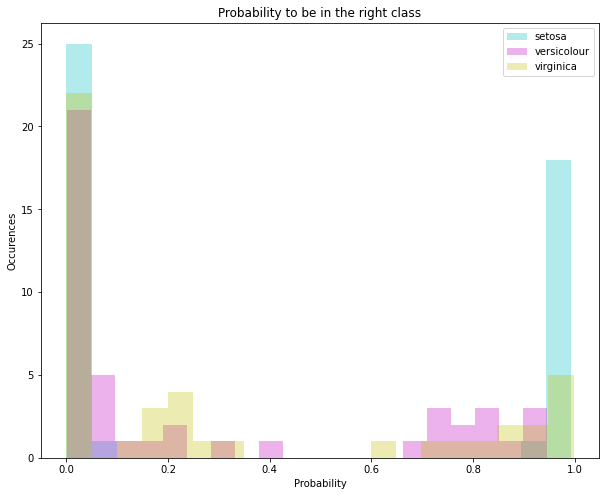

In [27]:
pred = model.predict_proba(X_test)
plt.figure(figsize = (10,8))
plt.hist(pred[:,0], histtype='stepfilled', color='c', label='setosa', alpha=0.3, bins=20)
plt.hist(pred[:,1], histtype='stepfilled', color='m', label='versicolour', alpha=0.3, bins=20)
plt.hist(pred[:,2], histtype='stepfilled', color='y', label='virginica', alpha=0.3, bins=20)
plt.legend()
plt.title('Probability to be in the right class')
plt.xlabel('Probability')
plt.ylabel('Occurences')
plt.show()

## Question 3

1. Explain how the probability estimate `predict_proba` is computed. Redo the calculation of this probability on the test dataset by using **only** `numpy` tools. *What are the differences with respect to the logistic regression method seen in the lecture and in the hands-on session* ?

2. Explain how the predicted class (the calculated class label) is determined for each example ?

 **Sigmoid function**: 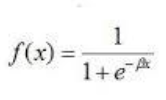

In [30]:
# Positive class probabilities are computed as the sigmoid function
#     1. / (1. + np.exp(-logistic.regression(X)));
prob = np.dot(X_test, model.coef_.T) + model.intercept_ ## prediction with weights and bias = np.dot(X_test, W) + b
prob = prob.ravel() if prob.shape[1] == 1 else prob #return a flatten array
prob *= -1 #-logistic.regression(X)
np.exp(prob, prob)
#prob += 1 #when added gives different results compare to predict_proba
np.reciprocal(prob, prob) #perform the reverse fraction

prob /= prob.sum(axis=1).reshape((prob.shape[0], -1)) #OvR normalization, like LibLinear's predict_probability for multiclass handling (over all the classes)

We're going to check if the value are equal on the three first rows.

In [31]:
prob[:5,]

array([[4.10208684e-03, 8.12291179e-01, 1.83606734e-01],
       [9.42033032e-01, 5.79663876e-02, 5.80104964e-07],
       [1.58665164e-08, 2.09418640e-03, 9.97905798e-01],
       [6.82525558e-03, 7.73233773e-01, 2.19940971e-01],
       [1.59550665e-03, 7.51298154e-01, 2.47106339e-01]])

In [32]:
pred[:5,]

array([[4.10208684e-03, 8.12291179e-01, 1.83606734e-01],
       [9.42033032e-01, 5.79663876e-02, 5.80104964e-07],
       [1.58665164e-08, 2.09418640e-03, 9.97905798e-01],
       [6.82525558e-03, 7.73233773e-01, 2.19940971e-01],
       [1.59550665e-03, 7.51298154e-01, 2.47106339e-01]])

In [33]:
#equality check
pred[:5,]==prob[:5,] #if we round to 8 digit all are True

array([[False,  True,  True],
       [ True, False, False],
       [False, False,  True],
       [False,  True,  True],
       [False, False, False]])

##### 2.
The sum of rows in the array obtain by *predict_proba* should be equal to 1. The arrays shows 3 different values which correpond to our label (here our 3 classes of iris). It is used to infer the probability that a particular data point falls into the underlying classes. Where the value of one of the three indexes of the array is superior to a threshold, it gives the predicted class.

In [34]:
display(model.predict_proba(X_test)[:3,:])
display(model.predict(X_test)[:3])

array([[4.10208684e-03, 8.12291179e-01, 1.83606734e-01],
       [9.42033032e-01, 5.79663876e-02, 5.80104964e-07],
       [1.58665164e-08, 2.09418640e-03, 9.97905798e-01]])

array([1, 0, 2])

In the first row, the predicted class is the index 1 because from the 3 indexes present in the *predict_proba array* the proba is the higher in the index 1 **(8.122911e-01)**. For the 2nd row the array of *predict* gives the predicted class to be 0, where we can find that the corresponding probability in the *predict_proba array* equal to **9.42033032e-01** which is the highest among the probability of the 3 indexes.

## Question 4: bonus question (optional)

Show the decision surfaces on the scatter plots of each feature versus another (question 1.2), with different color for each classes.

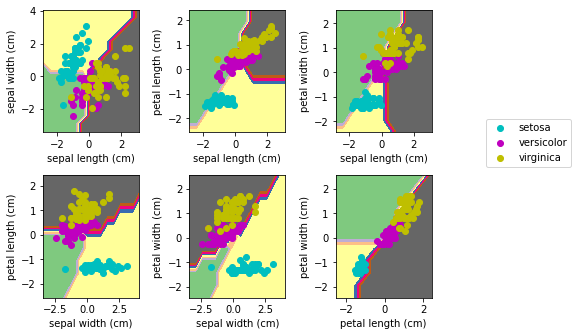

In [35]:
for pairidx, pair in enumerate([[sepal_length, sepal_width], [sepal_length, petal_length], [sepal_length, petal_width],
[sepal_width, petal_length], [sepal_width, petal_width], [petal_length, petal_width]]):
    X = iris.data[:, pair]
    t = iris.target 

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(450) 
    np.random.shuffle(idx)
    X = X[idx]
    y = t[idx]

    # Standardizing
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train the model
    lgr = LogisticRegression(solver="lbfgs",multi_class='multinomial',penalty='l2',max_iter=500)
    lgr = lgr.fit(X, t)

    # Decision boundary 
    plt.subplot(2, 3, pairidx + 1)
    plt.subplots_adjust(left  = 0, right = None, bottom = 0, top = 1, wspace = 0.52, hspace = 0.35)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x2, y2 = np.meshgrid(np.arange(x_min, x_max, 0.5),
                         np.arange(y_min, y_max, 0.5))

    z = lgr.predict(np.c_[x2.ravel(), y2.ravel()]) #flatten array
    z = z.reshape(x2.shape)
    surface = plt.contourf(x2, y2, z, cmap=plt.cm.Accent)
    #plt.colorbar(surface)
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # plot
    for i, color in zip(range(3), colors): #3 for number of classes
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Accent)
        
plt.legend(bbox_to_anchor=(2.5, 1.5))
plt.show()

***

# EXERCICE 3: Linear regression [6 points]

This exercice aims at fitting a simple 1-dimension toy dataset using the linear regression method. Two models are considered to fit the data.

## Initialization

In [36]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: explore the data

The data consists of 100 examples, each with a single feature `x` and target value `t`. Get the data by running the cell below.

In [37]:
# Load data
#-------------

x = np.array([-7.34242121e+00, -7.14732366e+00, -7.02726363e+00, -6.95972986e+00,
       -6.91470735e+00, -6.90720360e+00, -6.83216608e+00, -6.76463232e+00,
       -6.74212106e+00, -6.62956478e+00, -6.41195598e+00, -6.38194097e+00,
       -6.24687344e+00, -6.17933967e+00, -6.14182091e+00, -6.02176088e+00,
       -6.01425713e+00, -5.60905453e+00, -4.83616808e+00, -4.74612306e+00,
       -4.62606303e+00, -4.50600300e+00, -4.48349175e+00, -4.25087544e+00,
       -4.16083042e+00, -4.12331166e+00, -3.79314657e+00, -3.21535768e+00,
       -2.90770385e+00, -2.38994497e+00, -1.94722361e+00, -1.90220110e+00,
       -1.74462231e+00, -1.69959980e+00, -1.63956978e+00, -1.61705853e+00,
       -1.42196098e+00, -1.21185593e+00, -8.51675838e-01, -3.63931966e-01,
       -8.62931466e-02, -4.87743872e-02, -4.12706353e-02, -3.75187594e-03,
        1.61330665e-01,  2.13856928e-01,  2.96398199e-01,  4.01450725e-01,
        5.51525763e-01,  6.49074537e-01,  7.54127064e-01,  8.44172086e-01,
        9.41720860e-01,  9.71735868e-01,  1.24187094e+00,  1.54202101e+00,
        1.84967484e+00,  2.41995998e+00,  2.59254627e+00,  2.62256128e+00,
        2.69759880e+00,  2.81015508e+00,  2.87768884e+00,  3.10280140e+00,
        3.23036518e+00,  3.32791396e+00,  3.34292146e+00,  3.36543272e+00,
        3.47048524e+00,  3.59804902e+00,  3.90570285e+00,  4.01075538e+00,
        4.47598799e+00,  4.58104052e+00,  4.76863432e+00,  4.84367184e+00,
        4.85867934e+00,  4.88869435e+00,  4.96373187e+00,  5.04627314e+00,
        5.13631816e+00,  5.16633317e+00,  5.20385193e+00,  5.30890445e+00,
        5.76663332e+00,  5.80415208e+00,  5.85667834e+00,  5.94672336e+00,
        5.97673837e+00,  6.05177589e+00,  6.11930965e+00,  6.13431716e+00,
        6.14182091e+00,  6.18684342e+00,  6.27688844e+00,  6.50200100e+00,
        6.78714357e+00,  6.98974487e+00,  7.22986493e+00,  7.39494747e+00])

t = np.array([0.09383717, 0.06483006, 0.0635508 , 0.01558316, 0.05007212,
       0.06015119, 0.02940547, 0.07012062, 0.06468135, 0.07117534,
       0.06695462, 0.06011015, 0.10098985, 0.0578762 , 0.07026897,
       0.06268998, 0.06253439, 0.10721707, 0.10788754, 0.10623239,
       0.1550382 , 0.15413374, 0.16894159, 0.14332766, 0.1900307 ,
       0.12862216, 0.17738129, 0.20995135, 0.2466785 , 0.30360745,
       0.34040294, 0.34195604, 0.34703844, 0.35331085, 0.36185129,
       0.38124206, 0.43090156, 0.43839106, 0.4605407 , 0.53321628,
       0.53532215, 0.54921004, 0.51985094, 0.53672645, 0.54654159,
       0.58400162, 0.57257184, 0.58496298, 0.64613599, 0.63680086,
       0.63970072, 0.63165799, 0.68268795, 0.68532584, 0.69264053,
       0.70697764, 0.71159789, 0.79171708, 0.79614457, 0.78212065,
       0.78473694, 0.82711783, 0.82490762, 0.85822142, 0.82179743,
       0.82987056, 0.81035237, 0.82385674, 0.84988496, 0.89351301,
       0.8589366 , 0.88624541, 0.90615455, 0.91638509, 0.93059859,
       0.92025039, 0.92039465, 0.92422147, 0.93910186, 0.92528173,
       0.90324163, 0.91835668, 0.95530544, 0.96128225, 0.96511936,
       0.90728642, 0.94401647, 0.94746058, 0.94893006, 0.9275363 ,
       0.96810292, 0.93945371, 0.99039009, 0.95425657, 0.96463325,
       0.98169095, 0.9795599 , 0.97322917, 0.9951161 , 0.97246986])

Look at the data:

1. Make a scatter plot of `t` versus `x`. As you can see the relation between these variables is clearly non-linear.

2. Make a scatter plot of `log(t/(1-t))` versus `x`. Comment the result.

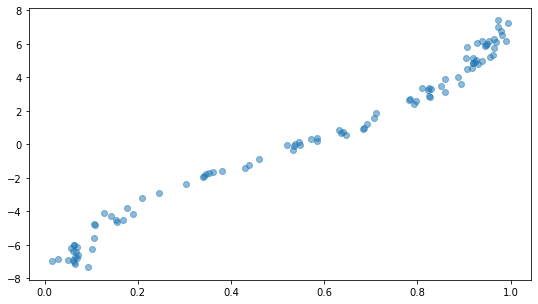

In [38]:
#Scatter plot of t versus x
plt.figure(figsize=(9,5))
plt.scatter(t, x, alpha=0.5)
plt.show()

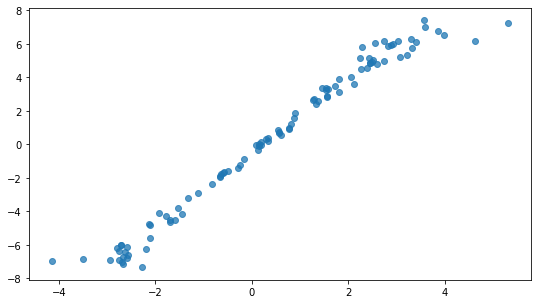

In [39]:
#Scatter plot of log_t versus x
log_t = np.log(t/(1-t))

plt.figure(figsize=(9,5))
plt.scatter(log_t, x, alpha=0.75)
plt.show()

We obtain a more linear distribution when we passed the log into our data. Compared to the first graph where the points are not distributed through a linear pattern.

## Question 2: fit the data

Using **only** `numpy` tools and your own custom functions do the following:

1. Fit the data with a linear function `y = ax +b`. Show the result of the fit on the `t` vs `x` scatter plot. Comment on the quality of the result.

2. Then, fit the data with a sigmoid function `y = sigmoid(ax +b)`. How can this be easily done with an appropriate transformation ? Show the result on the `t` vs `x` scatter plot. Comment on the result.

Hints: use the mean square error as cost function; remember to initialize the parameters (weights), to 0 for example; 1000 iterations with a learning rate of 0.005 should work.

In [40]:
#Reshaping
x=x.reshape(x.shape[0],1)
t=t.reshape(x.shape[0],1)

#Mtarix of all arrays vector 
X=np.hstack((x,np.ones(x.shape)))
theta=np.random.randn(2,1)

def model(X,theta):
    return X.dot(theta)

Y=model(X,theta)

#cost_fucntion 
def cost_function(X,y,theta):
    m=len(y)
    return  1/(2*m)*np.sum((model(X,theta)-y)**2)

def grd(X,y,theta):
    m=len(y)
    return  1/m *X.T.dot(model(X,theta)-y)

#gradient descent 
def gradient_descent(X,y,theta,learning_rate,n_interactions): 
    cost_history=np.zeros(n_interactions)
    for i in range(0,n_interactions):
        theta= theta - learning_rate * grd(X,y,theta)
        cost_history[i]=cost_function(X,y,theta) 
        
    return theta, cost_history

#minimization
def coef_determination(y, pred):
    u = ((y-pred)**2).sum()
    w = ((y-y.mean())**2).sum()
    return 1 - (u/w)

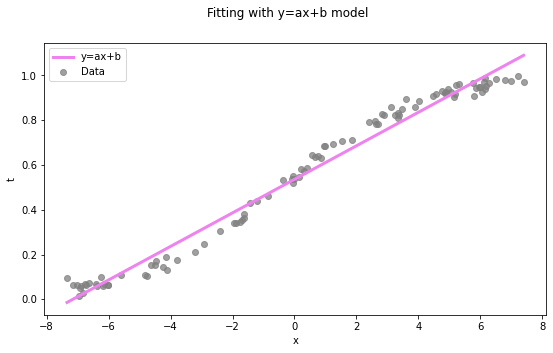

In [41]:
theta_, cost_history = gradient_descent(X,t,theta,learning_rate=0.005,n_interactions=1000)
predictions=model(X,theta_)
det = coef_determination(t,predictions)

#plot
plt.figure(figsize=(9,5))
plt.scatter(x, t, c="grey", alpha=0.75, linewidths=1, label="Data")
plt.plot(x, predictions, c='violet', linewidth=3, label="y=ax+b")
plt.xlabel('x')
plt.ylabel('t')
plt.legend()
plt.suptitle('Fitting with y=ax+b model')
plt.show()

#### 2.

In [42]:
def sigmoid(x,a,b):
     return b/(1 + np.exp(-a*x))

def mean_square_err(a, b, x, t):
    E = 0
    N = len(x)
    for i in range(N):
        E += (t[i] - sigmoid(x[i], a, b))**2
        E = E/float(N)

def update_weights(a, b, x, t, learning_rate):
    a_ = 0
    b_ = 0
    N = len(x)
    for i in range(N):
        a_ += -2*x[i] * (t[i] - sigmoid(x[i],a,b))
        b_ += -2*(t[i] - sigmoid(x[i],a,b))
    a -= (a_ / float(N)) * learning_rate
    b -= (b_ / float(N)) * learning_rate

    return a, b

nsteps=1000
sig_a = 0 # initial value for a
sig_b = 0 # initial value for b
learning_rate = 0.005

# Training
a_l = []
b_l = []
cost = []

for i in range(nsteps):
    sig_a, sig_b = update_weights(sig_a, sig_b, x, t, learning_rate)
    E_val = mean_square_err(sig_a, sig_b, x, t)
    a_l.append(sig_a)
    b_l.append(sig_b)
    cost.append(E_val)

a_l = np.array(a_l)
b_l = np.array(b_l)
cost = np.array(cost)

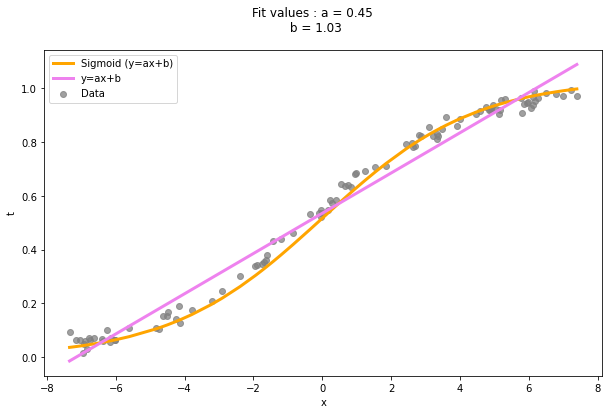

In [43]:
#plot
plt.figure(figsize=(10,6))
plt.scatter(x, t, c="grey", label='Data', alpha=0.75, linewidths=1)
plt.plot(x, sigmoid(x, sig_a, sig_b), color='orange', linewidth=3, label='Sigmoid (y=ax+b)')
plt.plot(x, predictions, c='violet', linewidth=3, label="y=ax+b")
plt.xlabel('x')
plt.ylabel('t')
plt.legend(loc='best')
plt.suptitle(f'Fit values : a = %.2f \n b = %.2f' % (sig_a, sig_b));
plt.show()

The fitting is better with the sigmoid function thant the linear regression which does not pass through all the points. 